In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp 
from scipy import signal

In [2]:
Fs = 100 
t = np.arange(0,1,1./Fs)

In [3]:
x = np.cos(2*np.pi*2*t) + 2*np.cos(2*np.pi*5*t)

In [4]:
r = np.random.randn(len(x))*0.5

In [5]:
x1 = x + r

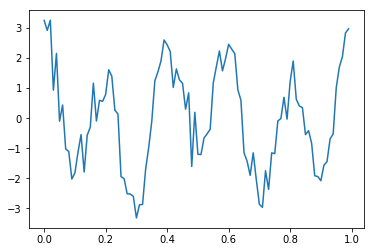

In [6]:
plt.plot(t , x1) 
plt.show()

In [7]:
b , a = signal.butter(5 ,0.1 , 'low')
w , h = signal.freqz(b , a) 
f_norm = w/sp.pi
f_novo = f_norm*(Fs/2)

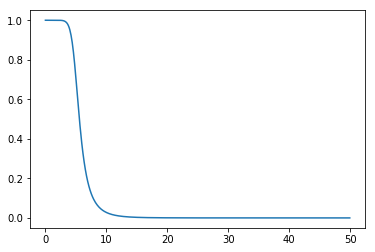

In [8]:
plt.plot(f_novo, sp.absolute(h))
plt.show()

C:\Users\mmarjanovic\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


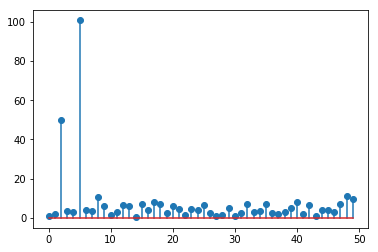

In [9]:
Y = sp.fft(x1)
F = sp.linspace(0,Fs, len(Y)+1)
F = F[:-1]
N = len(Y)
plt.stem(F[0:N/2], sp.absolute(Y[0:N/2])) 
plt.show()

In [10]:
def kvantizacija (vrednost , za_vrednosti): 
    n = None 
    p = None 
    
    for druga_vrednost in za_vrednosti:
        druga = abs(druga_vrednost - vrednost) 
        
        if n is None or druga < p: 
            n = druga_vrednost 
            p = druga 
    return n
        

In [11]:
kvant_nivo = 8
kvant_korak = 1./kvant_nivo

In [12]:
vreme = 1.
amplituda = 1.
odabiranje = 100.
period_odabiranja = 1./odabiranje 
broj_odabiranja = vreme/period_odabiranja 
vreme_odabiranja = np.linspace(0,vreme,broj_odabiranja)

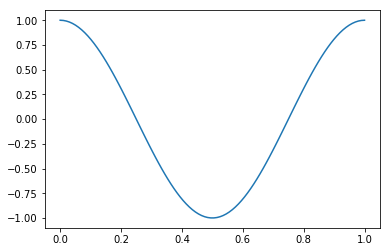

In [13]:
def signal (t): 
    return amplituda*np.cos(2*np.pi*t) 
odabrani_signal = signal(vreme_odabiranja) 
plt.plot(vreme_odabiranja, odabrani_signal) 
plt.show()

In [14]:
kvantizovani_signal = np.round(odabrani_signal/kvant_nivo)*kvant_nivo

In [15]:
kvantni_izlaz=np.zeros(len(kvantizovani_signal))
for i in range(0,len(kvantizovani_signal)-1):
    kvantni_izlaz[i]=kvantizacija(kvantizovani_signal[i], np.arange(-amplituda,amplituda,kvant_korak ))